In [12]:
import os.path as op
import glob   # to search for files using regex
import pandas as pd # for data manipulation
import numpy as np # for numerical operations


import matplotlib.pyplot as plt # for basic plotting

import nibabel as nib # to read and write neuroimaging data, https://nipy.org/nibabel/

# Nilearn modules, for the analysis of brain volumes, plotting, etc., https://nilearn.github.io/
from nilearn.image import load_img, math_img
from nilearn.plotting import plot_glass_brain, plot_design_matrix, plot_contrast_matrix, plot_stat_map, view_img, view_img_on_surf
from nilearn.glm.second_level import SecondLevelModel
from nilearn.glm.thresholding import threshold_stats_img
from nilearn.datasets import load_mni152_template, load_mni152_brain_mask
from nilearn.glm.second_level import non_parametric_inference
from nilearn.plotting import find_cut_slices





# to show plots in cell
%matplotlib inline   


In [74]:
#template I will be using 
mni152_template = load_mni152_template()

In [2]:
#right nifties
right_niftis = [
        "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/resampled_mni152/theta/theta_patient_05_part1R_to_mni152.nii.gz", 
        "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/resampled_mni152/theta/theta_patient_05_part2R_to_mni152.nii.gz", 
        "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/resampled_mni152/theta/theta_patient_06_to_mni152.nii.gz", 
        "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/resampled_mni152/theta/theta_patient_10_to_mni152.nii.gz", 
        "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/resampled_mni152/theta/theta_patient_11_part1_to_mni152.nii.gz", 
        "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/resampled_mni152/theta/theta_patient_11_part2_to_mni152.nii.gz", 
        "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/resampled_mni152/theta/theta_patient_13_to_mni152.nii.gz",
        "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/resampled_mni152/theta/theta_patient_14_part1_right_to_mni152.nii.gz", 
        "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/resampled_mni152/theta/theta_patient_14_part2_right_to_mni152.nii.gz", 
        "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/resampled_mni152/theta/theta_patient_17_to_mni152.nii.gz", 
        "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/resampled_mni152/theta/theta_patient_23_to_mni152.nii.gz",   
]


#left nifties
left_niftis = [
        "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/resampled_mni152/theta/theta_patient_05_part1L_to_mni152.nii.gz", 
        "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/resampled_mni152/theta/theta_patient_05_part2L_to_mni152.nii.gz", 
        "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/resampled_mni152/theta/theta_patient_08_to_mni152.nii.gz", 
        "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/resampled_mni152/theta/theta_patient_14_part1_left_to_mni152.nii.gz", 
        "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/resampled_mni152/theta/theta_patient_14_part2_left_to_mni152.nii.gz", 
        "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/resampled_mni152/theta/theta_patient_16_to_mni152.nii.gz",
        "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/resampled_mni152/theta/theta_patient_21_to_mni152.nii.gz", 
        "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/resampled_mni152/theta/theta_patient_22_to_mni152.nii.gz",  
        "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/resampled_mni152/theta/theta_patient_25_to_mni152.nii.gz",   
]

#all nifites - on the right + flipped lefts
all_niftis = ["/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/resampled_mni152/theta/theta_patient_05_part1R_to_mni152.nii.gz", 
        "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/resampled_mni152/theta/theta_patient_05_part2R_to_mni152.nii.gz", 
        "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/resampled_mni152/theta/flipped_img_theta/theta_patient_05_part1L_flipped.nii.gz",
        "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/resampled_mni152/theta/flipped_img_theta/theta_patient_05_part2L_flipped.nii.gz",
        "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/resampled_mni152/theta/theta_patient_06_to_mni152.nii.gz", 
        "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/resampled_mni152/theta/flipped_img_theta/theta_patient_08_flipped.nii.gz",
        "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/resampled_mni152/theta/theta_patient_10_to_mni152.nii.gz", 
        "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/resampled_mni152/theta/theta_patient_11_part1_to_mni152.nii.gz", 
        "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/resampled_mni152/theta/theta_patient_11_part2_to_mni152.nii.gz", 
        "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/resampled_mni152/theta/theta_patient_13_to_mni152.nii.gz",
        "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/resampled_mni152/theta/theta_patient_14_part1_right_to_mni152.nii.gz", 
        "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/resampled_mni152/theta/theta_patient_14_part2_right_to_mni152.nii.gz", 
        "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/resampled_mni152/theta/flipped_img_theta/theta_patient_14_part1_left_flipped.nii.gz",
        "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/resampled_mni152/theta/flipped_img_theta/theta_patient_14_part2_left_flipped.nii.gz",
        "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/resampled_mni152/theta/flipped_img_theta/theta_patient_16_flipped.nii.gz",
        "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/resampled_mni152/theta/theta_patient_17_to_mni152.nii.gz", 
        "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/resampled_mni152/theta/flipped_img_theta/theta_patient_21_flipped.nii.gz",
        "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/resampled_mni152/theta/flipped_img_theta/theta_patient_22_flipped.nii.gz",
        "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/resampled_mni152/theta/theta_patient_23_to_mni152.nii.gz",  
        "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/resampled_mni152/theta/flipped_img_theta/theta_patient_25_flipped.nii.gz"
]

all_niftis_avgs = [
        "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/resampled_mni152/mag/average_img/patient_5_average.nii.gz",
        "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/resampled_mni152/mag/mag_patient_06_to_mni152.nii.gz", 
        "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/resampled_mni152/mag/flipped_img_mag/mag_patient_08_flipped.nii.gz",
        "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/resampled_mni152/mag/mag_patient_10_to_mni152.nii.gz", 
        "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/resampled_mni152/mag/average_img/patient_11_average.nii.gz", 
        "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/resampled_mni152/mag/mag_patient_13_to_mni152.nii.gz",
        "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/resampled_mni152/mag/average_img/patient_14_average.nii.gz",
        "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/resampled_mni152/mag/flipped_img_mag/mag_patient_16_flipped.nii.gz",
        "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/resampled_mni152/mag/mag_patient_17_to_mni152.nii.gz", 
        "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/resampled_mni152/mag/flipped_img_mag/mag_patient_21_flipped.nii.gz",
        "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/resampled_mni152/mag/flipped_img_mag/mag_patient_22_flipped.nii.gz",
        "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/resampled_mni152/mag/mag_patient_23_to_mni152.nii.gz",  
        "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/resampled_mni152/mag/flipped_img_mag/mag_patient_25_flipped.nii.gz"]

In [3]:
#pick whcih files to do the analysis on
effect_files = all_niftis_avgs

In [4]:
#design matrix for one-sample t test
subjects = [f"sub{i+1:02}" for i in range(len(effect_files))]
design_matrix = pd.DataFrame([1]*len(subjects), index=subjects, columns=["swr_contrast"])

In [5]:
#fit second level model
swr_contrast_maps = [load_img(f) for f in effect_files]
second_level_model = SecondLevelModel()
second_level_model = second_level_model.fit(swr_contrast_maps, design_matrix=design_matrix)

In [6]:
#defining and computoing contrast
contrasts = {'High_vs_Low_SWR': [1]}
t_map = second_level_model.compute_contrast("swr_contrast", output_type="stat")
z_map = second_level_model.compute_contrast(contrasts['High_vs_Low_SWR'], output_type="z_score")
thresholded_map, threshold = threshold_stats_img(
    z_map, 
    alpha=0.05, 
    height_control= "fdr", 
)

/Users/lea/Desktop/PROJECT_DATA_ANALYSIS/venv/lib/python3.13/site-packages/nilearn/glm/thresholding.py:303: UserWarning: The given float value must not exceed 3.5146446133468636. But, you have given threshold=inf.
  stat_img = threshold_img(


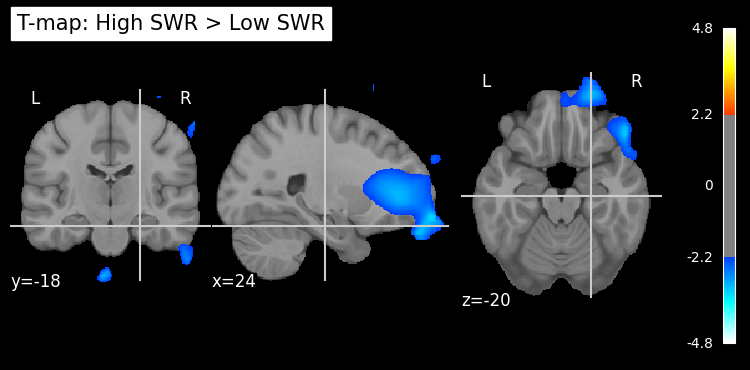

In [7]:
plot_stat_map(
    t_map,
    bg_img=load_mni152_template(),
    threshold=2.173,  
    display_mode='ortho',
    black_bg=True,
    cut_coords=(24, -18, -20), 
    title='T-map: High SWR > Low SWR'
)


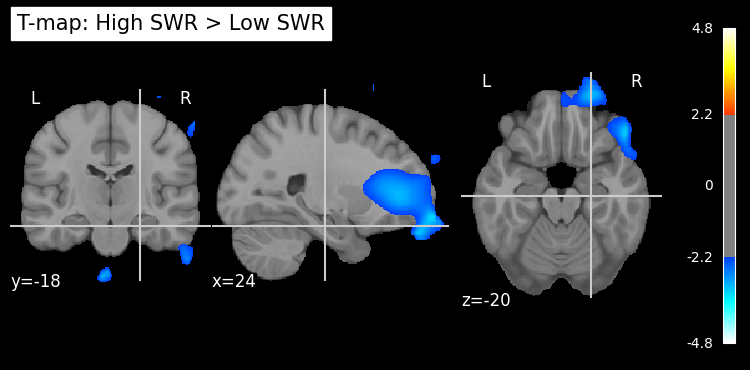

In [8]:
#uncorrected treshold based on df
#for p 0.05 if df = 19, t 2.093, df 8 == 2.306, df = 12 t=2.179
plot_stat_map(
    t_map,
    bg_img=load_mni152_template(),
    threshold=2.179,  
    display_mode='ortho',
    black_bg=True,
    cut_coords=(24, -18, -20), 
    title='T-map: High SWR > Low SWR'
)


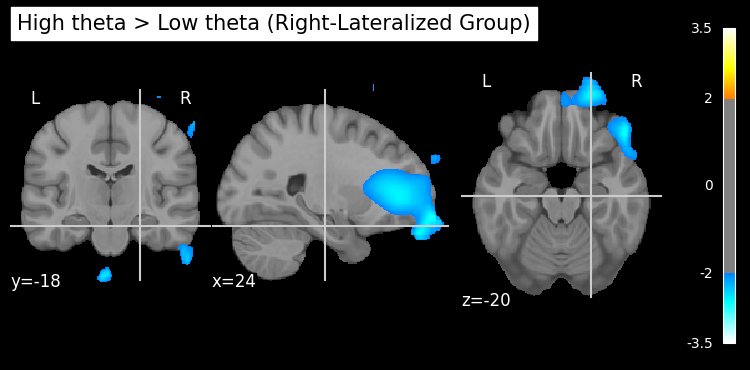

In [9]:
#plot z-map
plot_stat_map(
    z_map,
    bg_img=load_mni152_template(), 
    threshold= 1.96,   
    display_mode='ortho',  
    cut_coords=(24, -18, -20),  # approximate right hippocampus
    title='High theta > Low theta (Right-Lateralized Group)'
)



/Users/lea/Desktop/PROJECT_DATA_ANALYSIS/venv/lib/python3.13/site-packages/nilearn/plotting/displays/_slicers.py:313: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


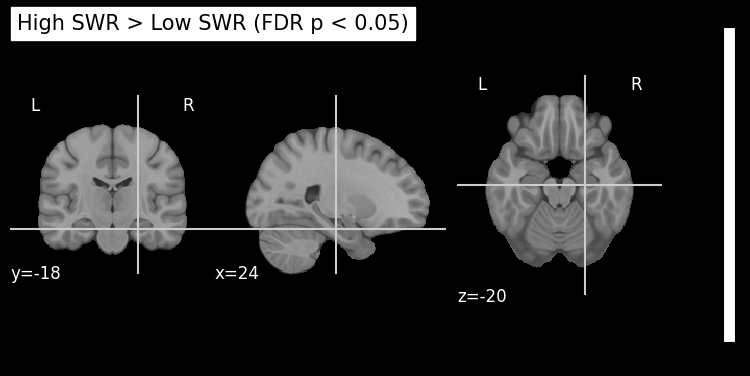

In [10]:
#using false discovery rate


plot_stat_map(
    thresholded_map,
    bg_img=load_mni152_template(),
    threshold=threshold,  # from your thresholding result
    display_mode='ortho',
    cut_coords=(24, -18, -20),  
    title='High SWR > Low SWR (FDR p < 0.05)'
)

#no voxels survied the trehsolding of 0.05 - so significant group effect

/Users/lea/Desktop/PROJECT_DATA_ANALYSIS/venv/lib/python3.13/site-packages/nilearn/plotting/displays/_slicers.py:313: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


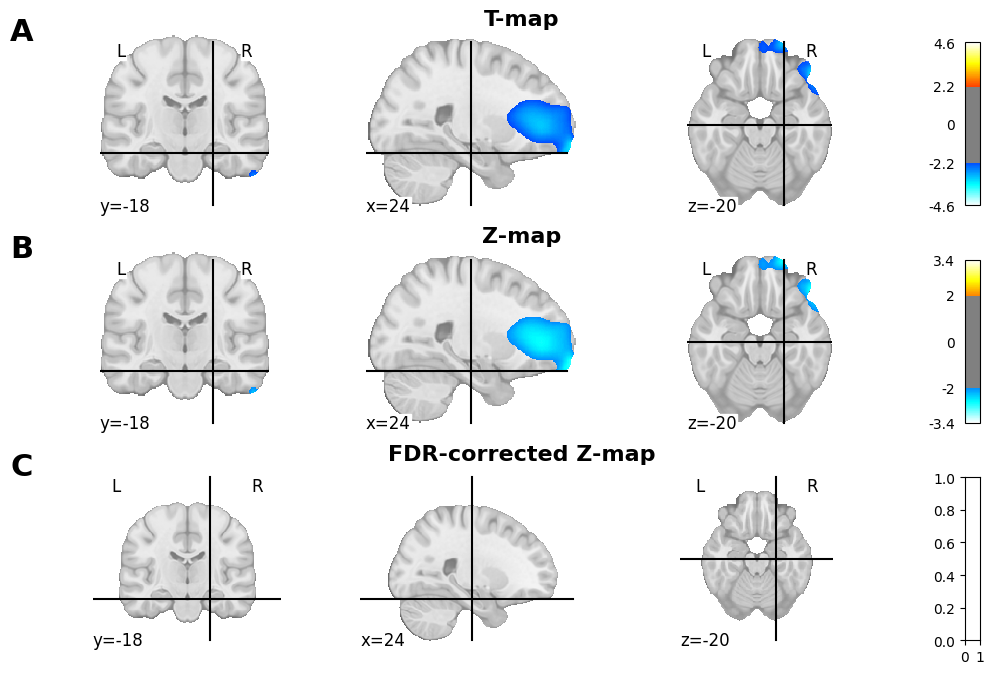

In [13]:
cut_coords = (24, -18, -20)


background_img = load_mni152_template()
brain_mask = load_mni152_brain_mask()

#apply brain mask
t_map_masked = math_img("img1 * img2", img1=t_map, img2=brain_mask)
z_map_masked = math_img("img1 * img2", img1=z_map, img2=brain_mask)
thresholded_map_masked = math_img("img1 * img2", img1=thresholded_map, img2=brain_mask)

# Font settings
panel_font = {'family': 'sans-serif', 'weight': 'bold', 'size': 22}
title_font = {'family': 'sans-serif', 'weight': 'bold', 'size': 16}

# Create figure
fig, axes = plt.subplots(3, 1, figsize=(12, 8), facecolor='white')

# Function to plot and label
def plot_panel(stat_img, threshold, ax, panel_label, title_text):
    display = plot_stat_map(
        stat_img,
        bg_img=background_img,
        threshold=threshold,
        display_mode='ortho',
        cut_coords=cut_coords,
        black_bg=False,
        axes=ax,
        colorbar=True
    )
    # Add panel label (top-left)
    ax.text(-0.05, 1.09, panel_label,  # slightly lower than 1.05
            transform=ax.transAxes,
            fontdict=panel_font,
            va='top', ha='left')
    # Add centered title, closer to brain
    ax.set_title(title_text, fontdict=title_font, loc='center')

# A: T-map
plot_panel(t_map_masked, threshold=2.179, ax=axes[0], panel_label="A", title_text="T-map")

# B: Z-map
plot_panel(z_map_masked, threshold=1.96, ax=axes[1], panel_label="B", title_text="Z-map")

# C: FDR-corrected T-map
plot_panel(thresholded_map_masked, threshold=threshold, ax=axes[2],
           panel_label="C", title_text="FDR-corrected Z-map")

# Layout adjustment
#plt.tight_layout()  
plt.show()



In [70]:
#use the non-paRAMETRIC permutation based FWE correction


out_dict = non_parametric_inference(
    effect_files,  
    design_matrix=design_matrix,  
    second_level_contrast='swr_contrast',
    n_perm=10, 
    two_sided_test=True,
    threshold=0.1,
    n_jobs=-1
)

print(out_dict.keys())

/Users/lea/Desktop/PROJECT_DATA_ANALYSIS/venv/lib/python3.13/site-packages/nilearn/glm/second_level/second_level.py:1147: UserWarning: The specified number of permutations is 10 and the number of jobs to be performed in parallel has set to 13. This is incompatible so only 10 jobs will be running. You may want to perform more permutations in order to take the most of the available computing resources.
  outputs = permuted_ols(
/Users/lea/Desktop/PROJECT_DATA_ANALYSIS/venv/lib/python3.13/site-packages/nilearn/mass_univariate/permuted_least_squares.py:925: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  image.new_img_like(masker.mask_img_, metric_map),
/Users/lea/Desktop/PROJECT_DATA_ANALYSIS/venv/lib/python3.13/site-packages/nilearn/masking.py:979: 

dict_keys(['t', 'logp_max_t', 'size', 'logp_max_size', 'mass', 'logp_max_mass'])


In [71]:
alpha = 0.05
masked = out_dict['logp_max_t'].get_fdata() > -np.log10(alpha)
masked_t_map = out_dict['t'].get_fdata() * masked

#mmasked t-map as a nifti
masked_t_map_img = nib.Nifti1Image(masked_t_map, out_dict['t'].affine)

In [72]:
#get the smallest t-value for colorbar, the maps are alsready tresholded
surviving_vals = masked_t_map[masked_t_map != 0]

if surviving_vals.size > 0:
    threshold_fwe = surviving_vals.min()
    print(f'FWE (perm.) p < 0.05 threshold: {threshold_fwe:.3f}')
else:
    threshold_fwe = None
    print('⚠️ No voxels survived FWE (perm.) correction at p < 0.05.')


⚠️ No voxels survived FWE (perm.) correction at p < 0.05.
